In [1]:
from utils.plotting import *
from DDPM import DDPM
from utils.constraints import SimpleConstraintProjector
from datasets import *
import numpy as np

In [8]:
# Define a 2D plane in 3D space
A = torch.tensor([1.0, 2.0, 3.0]).unsqueeze(0)  # Normal vector (x-axis)
b = torch.tensor([1.0])  # Offset (good gracious!)
# Create the dataset with the defined plane
dataset_orth = SmileyFaceDataset(num_samples=10000, A=A, b=b, example=True, noise_level=0.5)
data_points_orth = torch.stack([dataset_orth[i] for i in range(len(dataset_orth))])


/Users/katie/Documents/PhD/Research/ConstrainedDiffusionToolbox/datasets.py:37: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3

In [33]:
fig = plot_points_3d([data_points_orth.numpy()], A.squeeze(), b.squeeze())
fig.show()

In [34]:
print(data_points_orth.size())
import wandb
wandb.init()
trainer_orth = DDPM(data_points_orth.squeeze(), project_x0=False, project_x0_sample=True, constraints_dict={'linear_equality': (A,b)}, )
trainer_orth.train(epochs=1000)
generated_points_orth = torch.tensor(trainer_orth.sample(1000)).squeeze()

torch.Size([10000, 3])


Training:   0%|          | 0/1000 [00:00<?, ?epoch/s]

In [35]:
fig = plot_points_3d([generated_points_orth.numpy()],A=A.squeeze(), b=b.squeeze())
fig.show()

In [36]:
projector = SimpleConstraintProjector()
projector.add_constraints_from_dict({'linear_equality': (A,b)})

In [38]:
generated_points_orth_proj,_,_ = projector.project(generated_points_orth.squeeze())
fig = plot_points_3d([generated_points_orth_proj.squeeze().numpy()], A=A.squeeze(),b= b.squeeze())
fig.show()

A broadcasted: torch.Size([1000, 1, 3])
b broadcasted: torch.Size([1000, 1, 1])
AA_T_inv torch.Size([1000, 1, 1])
Ax_minus_b torch.Size([1000, 1, 1])


In [46]:
import wandb
wandb.init()
dataset = SmileyFaceDataset(num_samples=10000, A=A, b=b, example=False)
data_points = torch.stack([dataset[i] for i in range(len(dataset))])
trainer = DDPM(data_points, project_x0=False, project_x0_sample=True, constraints_dict={'linear_equality': (A,b)}, )
trainer.train(epochs=1000) # Diffusion model training!

/Users/katie/Documents/PhD/Research/ConstrainedDiffusionToolbox/datasets.py:37: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3])
b broadcasted: torch.Size([1, 1, 1])
AA_T_inv torch.Size([1, 1, 1])
Ax_minus_b torch.Size([1, 1, 1])
A broadcasted: torch.Size([1, 1, 3

Training:   0%|          | 0/1000 [00:00<?, ?epoch/s]

In [56]:
generated_points = torch.tensor(trainer.sample(1000)).squeeze()
fig = plot_points_3d([generated_points.numpy()], A.squeeze(), b.squeeze())
fig.show()

In [63]:
from utils.metrics import *
print(generated_points.size())
print(data_points.size())
print(generated_points_orth.size())
print(f'KL Divergence (approx via histograms) between original and standard diffusion: {compute_kl_divergence_hist(generated_points.squeeze(), data_points[0:1000,:].squeeze(), bins=50)}')
print(f'KL Divergence (approx via histograms) between original and orthogonally noised: {compute_kl_divergence_hist(generated_points_orth_proj.squeeze(), data_points[0:1000,:].squeeze(),bins=50)}')

torch.Size([1000, 3])
torch.Size([10000, 3])
torch.Size([1000, 3])
KL Divergence (approx via histograms) between original and standard diffusion: 10.445636749267578
KL Divergence (approx via histograms) between original and orthogonally noised: 12.682827949523926


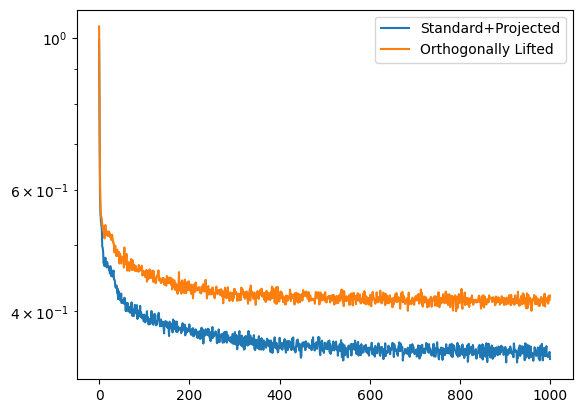

In [64]:
import matplotlib.pyplot as plt
plt.plot(trainer.training_losses, label = "Standard+Projected")
plt.plot(trainer_orth.training_losses, label = "Orthogonally Lifted")
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
import torch
# Define a 2D plane in 3D space
A = torch.tensor([1.0, 2.0, 3.0]).unsqueeze(0)  # Normal vector (x-axis)
b = torch.tensor([1.0])  # Offset
# Create the dataset with the defined plane
print(A.size())
print(b.size())
dataset_orth_sphere = SmileyFaceDataset(num_samples=10000, sphere_center=[0.0,0.0,0.0], sphere_radius=5.0,projection_type="sphere",example=True, noise_level=1.0)
data_points_orth_sphere = torch.stack([dataset_orth_sphere[i] for i in range(len(dataset_orth_sphere))])


torch.Size([1, 3])
torch.Size([1])


In [ ]:
fig = plot_points_3d([data_points_orth_sphere.numpy()], A=A.squeeze(),b=b.squeeze())
fig.show()

(10000, 3)
